<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 4 October, 23:59)</span>. It is expected that you will pose a questions about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2021 that we've been using). 

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2020 (Session 75). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1970-2020.tar.gz</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook. 

Notice that the 76th session of the UN General Assembly - where the 2021 debates will happen - will occur in 14-30 September 2021, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/76/meetings/). 

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that date [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the correspondig CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [1]:
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename),encoding="utf8") #Add the encoding
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

Session  Year ISO-alpha3 Code  \
8476       75  2020             WSM   
8477       75  2020             YEM   
8478       75  2020             ZAF   
8479       75  2020             ZMB   
8480       75  2020             ZWE   

                                                 Speech  
8476  Mr. President,\nDistinguished delegates,\nLadi...  
8477  In the name of God the Merciful and the Compas...  
8478  President of the General Assembly, Secretary-G...  
8479  Your excellency Mr. Volkan Bozkir, President o...  
8480  Your Excellency, Ambassador Volkan Bozkir, Pre...

When you download file 'UNSD — Methodology.csv' ([link](https://unstats.un.org/unsd/methodology/m49/overview/)) and try to load it, you find an error: some rows in the file have 17 elements, others have 16. You start to notice why data cleaning and pre-processing are relevant (and time consuming).

In [2]:
df_codes = pd.read_csv('UNSD — Methodology.csv')
df_codes.tail()

Global Code Global Name  Region Code Region Name  Sub-region Code  \
244            1       World          9.0     Oceania             61.0   
245            1       World          9.0     Oceania             61.0   
246            1       World          9.0     Oceania             61.0   
247            1       World          9.0     Oceania             61.0   
248            1       World          9.0     Oceania             61.0   

    Sub-region Name  Intermediate Region Code Intermediate Region Name  \
244       Polynesia                       NaN                      NaN   
245       Polynesia                       NaN                      NaN   
246       Polynesia                       NaN                      NaN   
247       Polynesia                       NaN                      NaN   
248       Polynesia                       NaN                      NaN   

               Country or Area  M49 Code ISO-alpha2 Code ISO-alpha3 Code  \
244                      Samoa       882              WS             WSM   
245                    Tokelau       772              TK             TKL   
246                      Tonga       776              TO             TON   
247                     Tuvalu       798              TV             TUV   
248  Wallis and Futuna Islands       876              WF             WLF   

    Least Developed Countries (LDC) Land Locked Developing Countries (LLDC)  \
244                             NaN                                     NaN   
245                             NaN                                     NaN   
246                             NaN                                     NaN   
247                               x                                     NaN   
248                             NaN                                     NaN   

    Small Island Developing States (SIDS) Developed / Developing Countries  
244                                     x                       Developing  
245                                   NaN                       Developing  
246                                     x                       Developing  
247                                     x                       Developing  
248                                   NaN                       Developing

Notice that in line 67 of the CSV file we have:

001,World,019,Americas,419,Latin America and the Caribbean,029,Caribbean,Bonaire, Sint Eustatius and Saba,535,BQ,BES,,,x,Developing

**There is an extra comma in the Country name "Bonaire, Sint Eustatius and Saba", which, given the comma-separated format we are using, leads the country name to be divided in an extra token. Remove that comma or substitue by hyphen.**

**Q: Can you figure out the similar problem and solve lines 126 and 127?**

Yes. The issue was that there was a comma between China and the second part of the 'country name'. Once the comma was removed in both rows, it worked well.

**Q: Can you create a merged DataFrame — merge between df_codes and df_speech according to ISO-alpha3 and composed of columns \["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Developed / Developing Countries", "Session", "Year", "Speech"\]? It would be convinient to have index as (Year, 'ISO-alpha3 Code')**

In [3]:
df_merged = pd.merge(df_codes, df_speech, on='ISO-alpha3 Code')
df_merged = df_merged[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Developed / Developing Countries", "Session", "Year", "Speech"]]

In [26]:
df_un_merged = df_merged.set_index(['Year','ISO-alpha3 Code'])
df_un_merged.head()

Country or Area Region Name  Sub-region Name  \
Year ISO-alpha3 Code                                                
1970 DZA                     Algeria      Africa  Northern Africa   
1971 DZA                     Algeria      Africa  Northern Africa   
1972 DZA                     Algeria      Africa  Northern Africa   
1973 DZA                     Algeria      Africa  Northern Africa   
1974 DZA                     Algeria      Africa  Northern Africa   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 DZA                                   Developing       25   
1971 DZA                                   Developing       26   
1972 DZA                                   Developing       27   
1973 DZA                                   Developing       28   
1974 DZA                                   Developing       29   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 DZA              1.  The delegation of Algeria is very pleased ...  
1971 DZA              \n154.\t : It is not only in order to keep up ...  
1972 DZA              Mr. President, in electing you to preside over...  
1973 DZA              ﻿121.\tMr. President, since a tradition appear...  
1974 DZA              Mr. President, it would be ungracious of the r...

We are now going to use NLTK

Please run the cell below to import NLTK and download the needed resources

In [27]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Let us now see some examples of word analysis with NLTK:

Which were the most frequent words used in the Austrian Speech in 1970?

In [28]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# load text of Austria in 1970
text = df_un_merged.loc[1970,'AUT']["Speech"]

# tokenize words
words = word_tokenize(text)

# compute word frequency
freq = FreqDist(words)

# show 30 most frequent words
freq.most_common(30)

[('the', 383),
 ('of', 268),
 (',', 180),
 ('to', 163),
 ('.', 160),
 ('and', 116),
 ('in', 104),
 ('a', 91),
 ('that', 55),
 ('by', 39),
 ('this', 39),
 ('for', 39),
 ('which', 38),
 ('be', 35),
 ('on', 34),
 ('is', 32),
 ('United', 30),
 ('The', 29),
 ('Nations', 28),
 ('as', 27),
 ('Austria', 26),
 ('our', 23),
 ('with', 23),
 ('I', 22),
 ('international', 22),
 ('it', 22),
 ('has', 21),
 ('States', 21),
 ('all', 20),
 ('its', 20)]

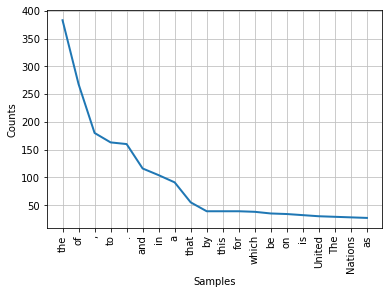

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
# plot the histogram with the top most used words
freq.plot(20)

Notice that the most frequent words are not that informative about the Austrian speech (the, of, to...). These words are often called *stop-words*. These words are generally filtered out before processing text (natural language). These are actually some of the most common words in any language (articles, prepositions, pronouns, conjunctions, etc) but do not add much information to the text. Let's now use NLTK to filter those words

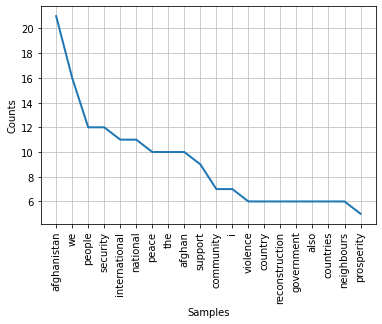

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw and w.isalpha() == True):
            no_sw.append(w.lower())
    return no_sw

text = df_un_merged.loc[2002,"AFG"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)

**Q: Can you change the method preprocess to put all words in lower case, remove punctuation and remove non-informative words (e.g., United Nations)?**

Tip: the method isalpha() might be useful

A regular expression is a sequence of characters that specifies a pattern. Usually, such patterns are used by to find, match, replace sub-strings within a document. Regular expressions have a particular syntax and are often useful to clean and pre-process textual data. Here one example where the regular expression 'afg.\*' is used to match any word that starts with afg and is followed by any character. 

In [31]:
# Regular expression example
s = set({})
import re
for w in words:
    if re.match('afg.*', w):
        s.add(w)
print(s)

{'afghans', 'afghan', 'afghanistan'}


Another useful usage of NLTK is performing sentiment analysis.

Sentiment analysis can be seen as the process of automatically classifying text into positive or negative sentiment categories. With NLTK, you can employ these algorithms without effort. This was also called opinion mining.

In the political field, sentiment analysis is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level or to derive the opinion or attitude of a speaker.

NLTK implements VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis. VADER uses a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

NLTK implements VADER through the module SentimentIntensityAnalyzer. Below an example of application (with natural limitations as VADER is specifically attuned to sentiments expressed in **social media**):

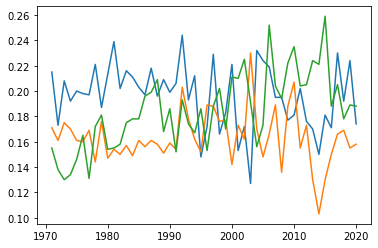

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

vecUSA = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"USA"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecRUS = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"RUS"]["Speech"])['pos'] for i in np.arange(1971, 2021)]
vecCHN = [sia.polarity_scores(df_un_merged.loc(axis=0)[i,"CHN"]["Speech"])['pos'] for i in np.arange(1971, 2021)]

fig, ax = plt.subplots()
ax.plot(np.arange(1971, 2021), vecUSA)
ax.plot(np.arange(1971, 2021), vecRUS)
ax.plot(np.arange(1971, 2021), vecCHN)
plt.show()

In [33]:
happinessdataframe = pd.read_excel('DataPanelWHR2021C2.xls', index_col=[0,1]) 
happinessdataframe

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.370100        0.450662   
             2009     4.401778            7.539972        0.552308   
             2010     4.758381            7.646709        0.539075   
             2011     3.831719            7.619532        0.521104   
             2012     3.782938            7.705479        0.520637   
...                        ...                 ...             ...   
Zimbabwe     2016     3.735400            7.984372        0.768425   
             2017     3.638300            8.015738        0.754147   
             2018     3.616480            8.048798        0.775388   
             2019     2.693523            7.950132        0.759162   
             2020     3.159802            7.828757        0.717243   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.799999   
             2009                         51.200001   
             2010                         51.599998   
             2011                         51.919998   
             2012                         52.240002   
...                                             ...   
Zimbabwe     2016                         54.400002   
             2017                         55.000000   
             2018                         55.599998   
             2019                         56.200001   
             2020                         56.799999   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.167640   
             2009                      0.678896    0.190099   
             2010                      0.600127    0.120590   
             2011                      0.495901    0.162427   
             2012                      0.530935    0.236032   
...                                         ...         ...   
Zimbabwe     2016                      0.732971   -0.094634   
             2017                      0.752826   -0.097645   
             2018                      0.762675   -0.068427   
             2019                      0.631908   -0.063791   
             2020                      0.643303   -0.008696   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.517637         0.258195  
             2009                   0.850035         0.583926         0.237092  
             2010                   0.706766         0.618265         0.275324  
             2011                   0.731109         0.611387         0.267175  
             2012                   0.775620         0.710385         0.267919  
...                                      ...              ...              ...  
Zimbabwe     2016                   0.723612         0.737636         0.208555  
             2017                   0.751208         0.806428         0.224051  
             2018                   0.844209         0.710119         0.211726  
             2019                   0.830652         0.716004         0.235354  
             2020                   0.788523         0.702573         0.345736  

[1949 rows x 9 columns]

Some questions I have in mind that might be interesting:

* What are the words used by the happiest countries in the world ? Does this change over time? What about the saddest countries? 
* What are the most used words per continent ? Does this changes over time?
* What can we see about the influence of big international events on speeches? For example, did the 2008 subprime crisis change the speeches ? What about the Paris agreement on the climate in 2015?

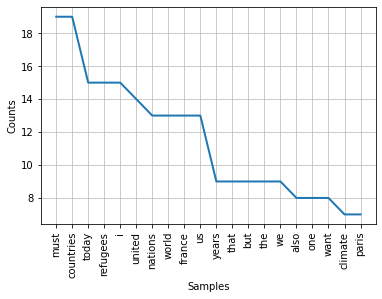

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
text = df_un_merged.loc[2015,"FRA"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)